# Deep Learning



## AI, Machine Learning and Deep Learning

Artificial Intelligence is the widest categorization of analytical methods that aim to automate intellectual tasks normally performed by humans.  Machine learning can be considered to be a sub-set of the wider AI domain where a system is trained rather than explicitly programmed. It’s presented with many examples relevant to a task, and it finds statistical structure in these examples that eventually allows the system to come up with rules for automating the task.  

The "deep" in deep learning is not a reference to any kind of deeper or intuitive understanding of data achieved by the approach.  It simply stands for the idea of successive layers of representation of data.  The number of layers in a model of the data is called the depth of the model.  

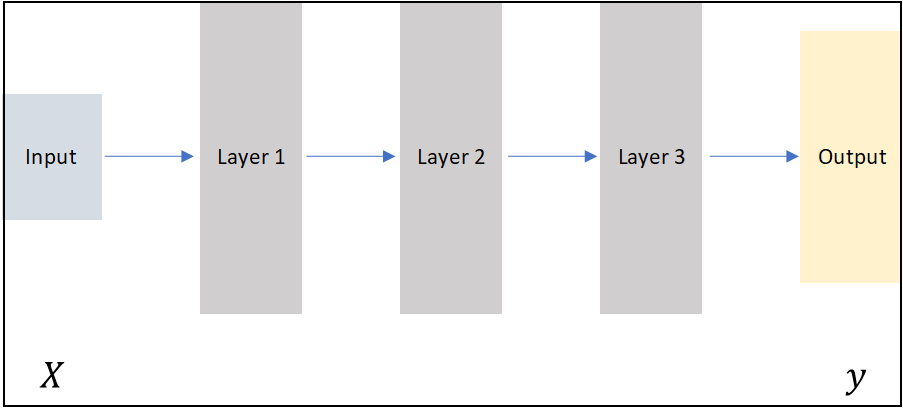

Modern deep learning may involve tens or even hundreds of successive layers of representations.  Each layer has parameters that have been ‘learned’ (or optimized) from the training data.  These layered representations are encapsulated in models termed neural networks, quite literally layers of data arrays stacked on top of each other.

**Deep Learning, ML and AI:** Deep learning is a specific subfield of machine learning: learning from data that puts an emphasis on learning successive layers of increasingly meaningful representations. The deep in deep stands for this idea of successive layers of representations.  Deep learning is used extensively for problems of perception – vision, speech and language.   



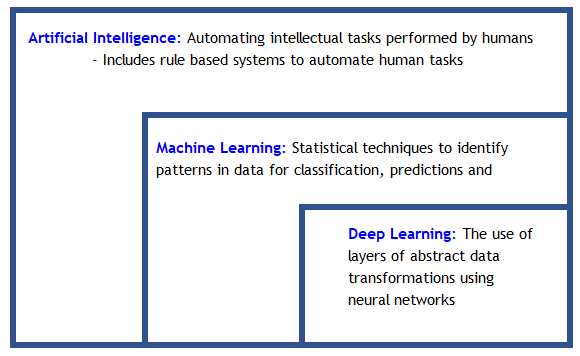


The below graphic explains the difference between traditional programming and machine learning (which includes deep learning).  

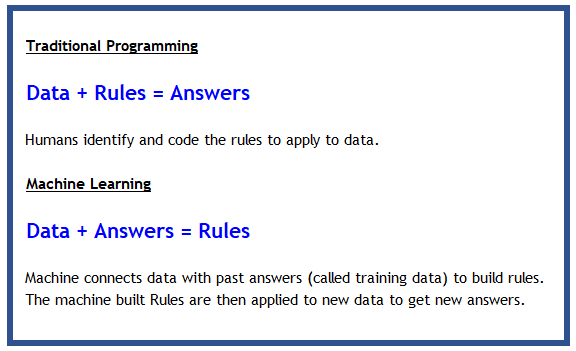


## A First Neural Net
Before we dive into more detail, let us build our first neural net with Tensorflow & Keras.  This will help place in context the explanations that are provided later.  Do not worry if not everything in the example makes sense yet, the goal is to get a high level view before we look at the more interesting stuff.  

### Diamond price prediction  
We will use our diamonds dataset again, and try to predict the price of a diamond with the dataset.  We load the data, and split it into training and test sets.  In fact, we follow the regular machine learning workflow that we repeatedly followed in the prior chapter. 

**As always, some library imports first...**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_squared_error
import sklearn.preprocessing as preproc
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
## Load data

diamonds = sns.load_dataset("diamonds")

In [3]:
## Let us examine the dataset

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
## Get dummy variables

diamonds = pd.get_dummies(diamonds)

In [5]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [6]:
## Define X and y as arrays. y is the price column, X is everything else

X = diamonds.loc[:, diamonds.columns != 'price'].values
y = diamonds.price.values

In [7]:
## Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# A step to convert the arrays to floats
X_train = X_train.astype('float')
X_test = X_test.astype('float')

**Next, we build a model**  
We created a model using Layers.  
  - A ‘Layer’ is a fundamental building block that takes an array, or a ‘tensor’ as an input, performs some calculations, and provides an output. Layers generally have weights, or parameters.  Some layers are ‘stateless’, in that they do not have weights (eg, the flatten layer).  
  - Layers were arranged sequentially in our model.  The output of a layer becomes the input for the next layer.  Because layers will accept an input of only a certain shape, the layers need to be compatible.  
  - The arrangement of the layers defines the architecture of our model.  


In [8]:
## Now we build our model

model = keras.Sequential() #Instantiate the model
model.add(Input(shape=(X_train.shape[1],))) ## INPUT layer
model.add(Dense(200, activation = 'relu')) ## Hidden layer 1
model.add(Dense(200, activation = 'relu')) ## Hidden layer 2
model.add(Dense(200, activation = 'relu')) ## Hidden layer 3
model.add(Dense(200, activation = 'relu')) ## Hidden layer 4
model.add(Dense(1, activation = 'linear')) ## OUTPUT layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               5400      
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 126201 (492.97 KB)
Trainable params: 126201 (492.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile** the model.  
Next, we compile() the model.  The compile step configures the learning process.  As part of this step, we define at least three more things: 
  - The Loss function/Objective function,  
  - Optimizer, and  
  - Metrics.  


In [9]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])

Finally, we `fit()` the model.  

This is where the training loop runs.  It needs the data, the number of epochs, and the batch size for mini-batch gradient descent.


In [10]:
history = model.fit(X_train, y_train, epochs = 3, batch_size = 128, validation_split = 0.2)

Epoch 1/3
270/270 [==============================] - 3s 6ms/step - loss: 13711563.0000 - mean_squared_error: 13711563.0000 - val_loss: 2490953.5000 - val_mean_squared_error: 2490953.5000
Epoch 2/3
270/270 [==============================] - 1s 5ms/step - loss: 1412317.3750 - mean_squared_error: 1412317.3750 - val_loss: 1085483.2500 - val_mean_squared_error: 1085483.2500
Epoch 3/3
270/270 [==============================] - 1s 4ms/step - loss: 865803.5625 - mean_squared_error: 865803.5625 - val_loss: 752875.0625 - val_mean_squared_error: 752875.0625


Notice that when fitting the model, we assigned the fitting process to a variable called `history`.  This helps us capture the training metrics and plot them afterwards.  We do that next.  

Now we can plot the training and validation MSE

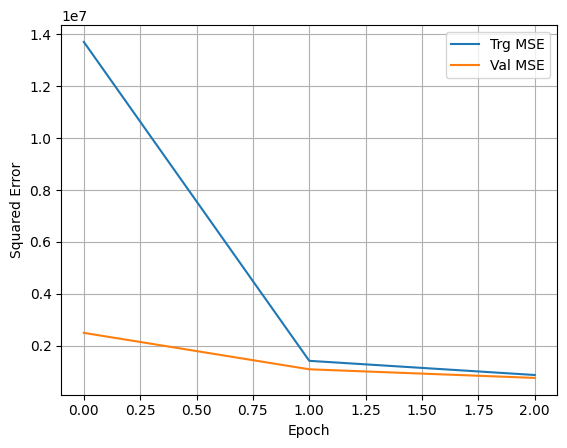

In [11]:
plt.plot(history.history['mean_squared_error'], label='Trg MSE')
plt.plot(history.history['val_mean_squared_error'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)

In [12]:
X_test

array([[ 2.35, 61.8 , 58.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.6 , 58.7 , 58.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.72, 61.6 , 56.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.53, 60.5 , 60.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.8 , 62.  , 56.  , ...,  0.  ,  1.  ,  0.  ],
       [ 1.51, 61.1 , 60.  , ...,  0.  ,  1.  ,  0.  ]])

In [13]:
## Perform predictions

y_pred = model.predict(X_test)

338/338 [==============================] - 0s 1ms/step


In [14]:
## With the predictions in hand, we can calculate RMSE and other evaluation metrics

print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  1900421.5219580135
RMSE =  1378.5577688142102
MAE =  496.28198081792


Text(0, 0.5, 'Predicted')

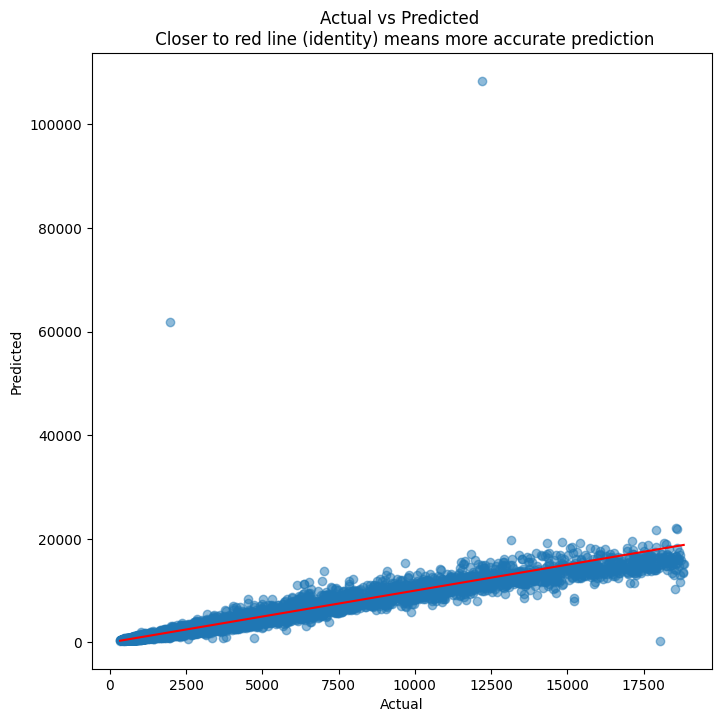

In [15]:
## Next, we scatterplot the actuals against the predictions

plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted \n Closer to red line (identity) means more accurate prediction')
plt.plot( [y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [16]:
## R-squared calculation

pd.DataFrame({'actual':y_test, 'predicted':y_pred.ravel()}).corr()**2

,actual,predicted
actual,1.000000,0.886189
predicted,0.886189,1.000000


## Understanding Neural Networks  
### Understanding the structure  

A neural net is akin to a mechanism that can model any type of function.  So given any input, and a set of labels/outputs, we can ‘train the network’ to produce the output we desire.  

Imagine a simple case where there is an input $a^0$ and an output $a^1$. (The superscript indicates the layer number, and is not the same as a^n!)  


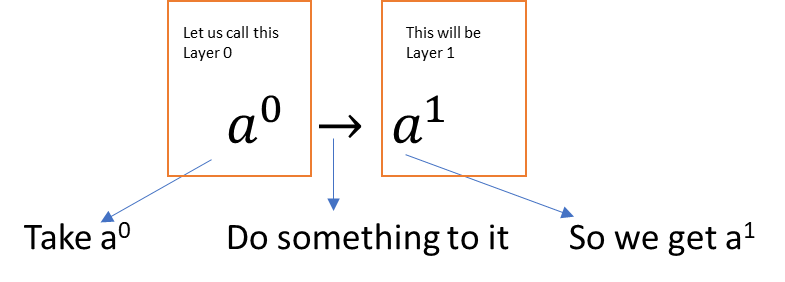  

In other words, we have a transformation to perform.
One way to do this  $a^0→ a^1$ is using a scalar weight w, and a bias term b.

$a^1=\sigma(wa^0+b)$  
  - $\sigma$ is the activation function (more on this later)  
  - w is the weight  
  - b is the bias  

The question for us is: How can we derive the values of $w$ and $b$ as to get the correct value for the output?

Now imagine there are two input variables (or two features)

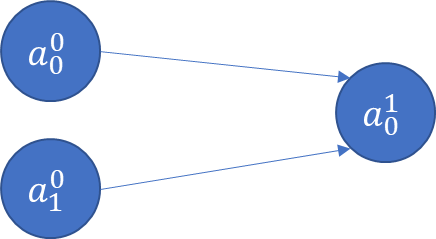  

$a_0^1=\sigma(w_0 a_0^0+w_1 a_1^0+b)$


If we have more inputs/features, say $a_j^0$, then generally:

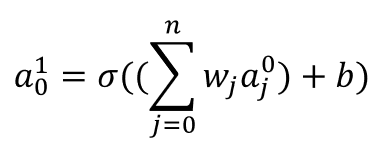


Now consider a situation where there is an extra output $a_1^1$ (eg, multiple categories).  
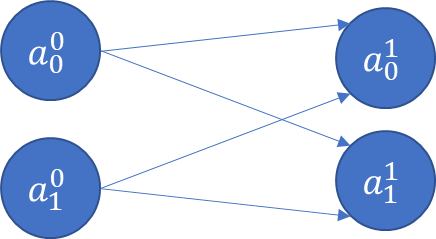

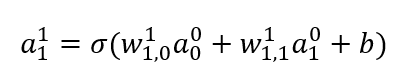

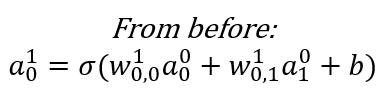

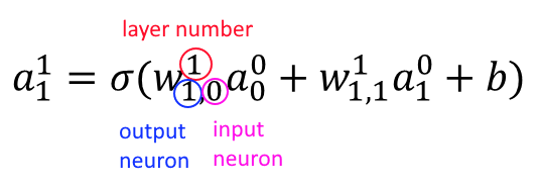


### Hidden Layers  
So far we have seen the input layer (called Layer 0), and the output layer (Layer 1).  We started with one input, one output, and went to two inputs and two outputs.  

At this point, we have 4 weights, and 2 bias terms.  We also don’t know what their values should be.  Next, let us think about adding a new hidden layer between the input and the output layers!  

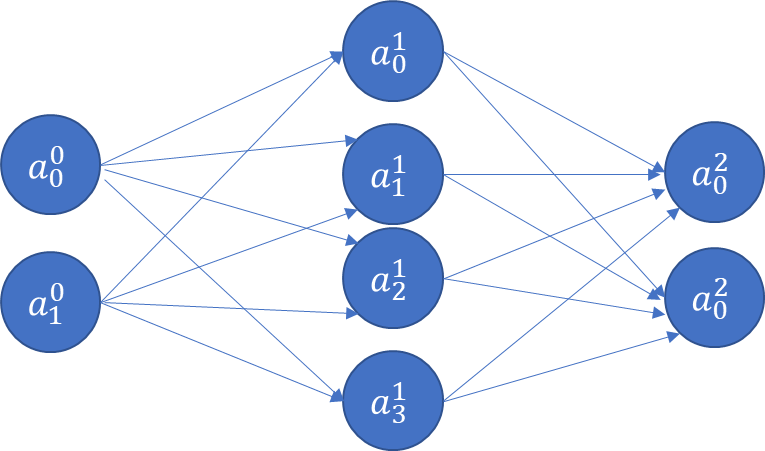

The above is a fully connected network, because each node is connected with every node in the subsequent layer.
‘Connected’ means the node contributes to the calculation of the subsequent node in the network.  

The value of each node (other than the input layer which is provided to us) can be calculated by a generalization of the formula below.
Fortunately, all the weights for a Layer can be captured as a weights matrix, and all the biases can also be captured as a vector. That makes the math expression very concise.  


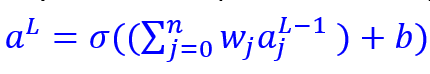


**An Example Calculation**  
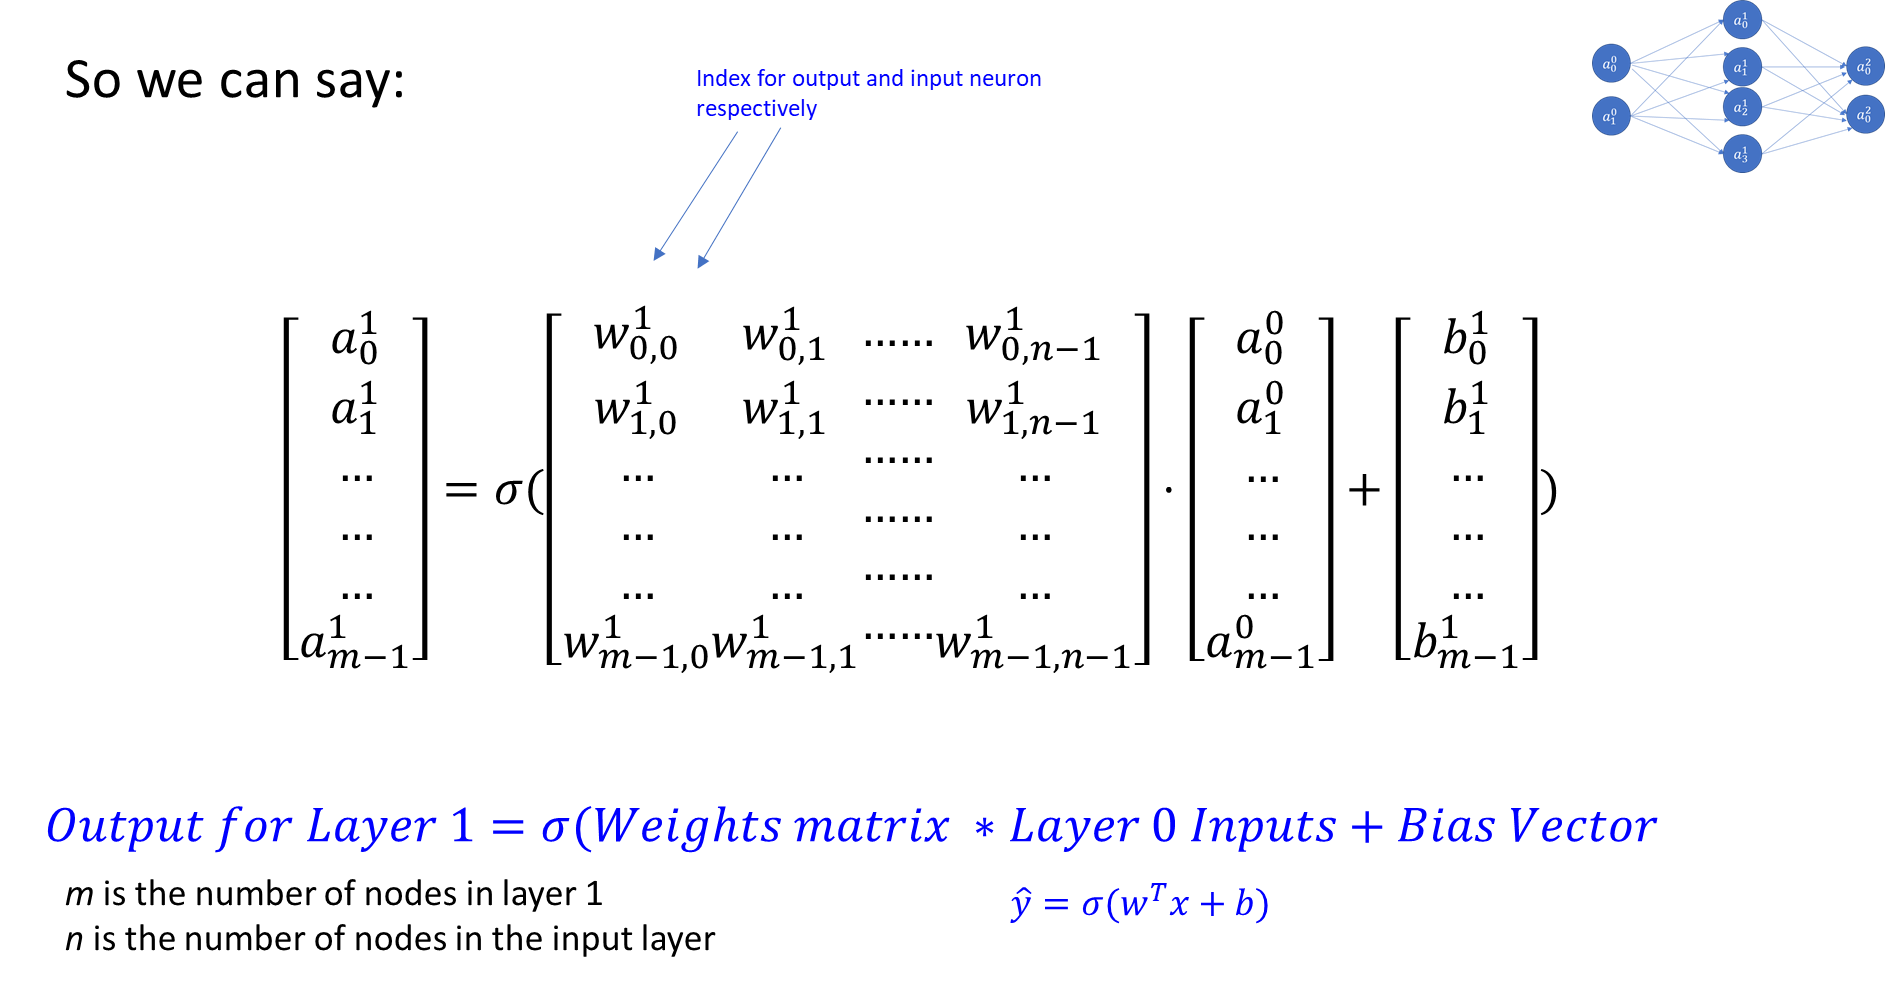

**Generalizing the Calculation**

In fact, not only can we combine all the weights and bias for a single layer into a convenient matrix representation, we can also combine all the weights and biases for all the layers in a network into a single weights matrix, and a bias matrix.

The arrangement of the weights and biases matrices, that is, the manner in which the dimensions are chosen, and the weights/biases are recorded inside the matrix, is done in a way that they can simply be multiplied to get the final results.

This reduces the representation of the network’s equation to: $\hat{y}=\sigma(w^T x+b)$, where w is the weights matrix, b is the bias matrix, and \sigma is the activation function.  (y-hat is the prediction, and $w^T$ stands for transpose of the weights matrix.  The transposition is generally required given the traditional way of writing the weights matrix.)  

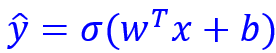


### Activation Function

So far all we have covered is that in a neural net, every subsequent layer is a function of weights, bias, and something that is called an activation function.  

Before the function is applied, the math is linear, and the equation similar to the one for regression (compare $mx+b$  to $w^T x+b$).

An activation function is applied to the linear output of a layer to obtain a non-linear output.  The ability to obtain non-linear results significantly expands the nature of  problems that can be solved, as decision boundaries of any shape can be modeled. 
There are many different choices of activation functions, and a choice is generally made based on the use case.  

The below are the most commonly used activation functions.  

You can find many other specialized activation functions in other textbooks, and also on Wikipedia.  

The main function of activation functions is to allow non-linearity into the outputs, increasing significantly the flexibility of the patterns that can be modeled by a neural network.  

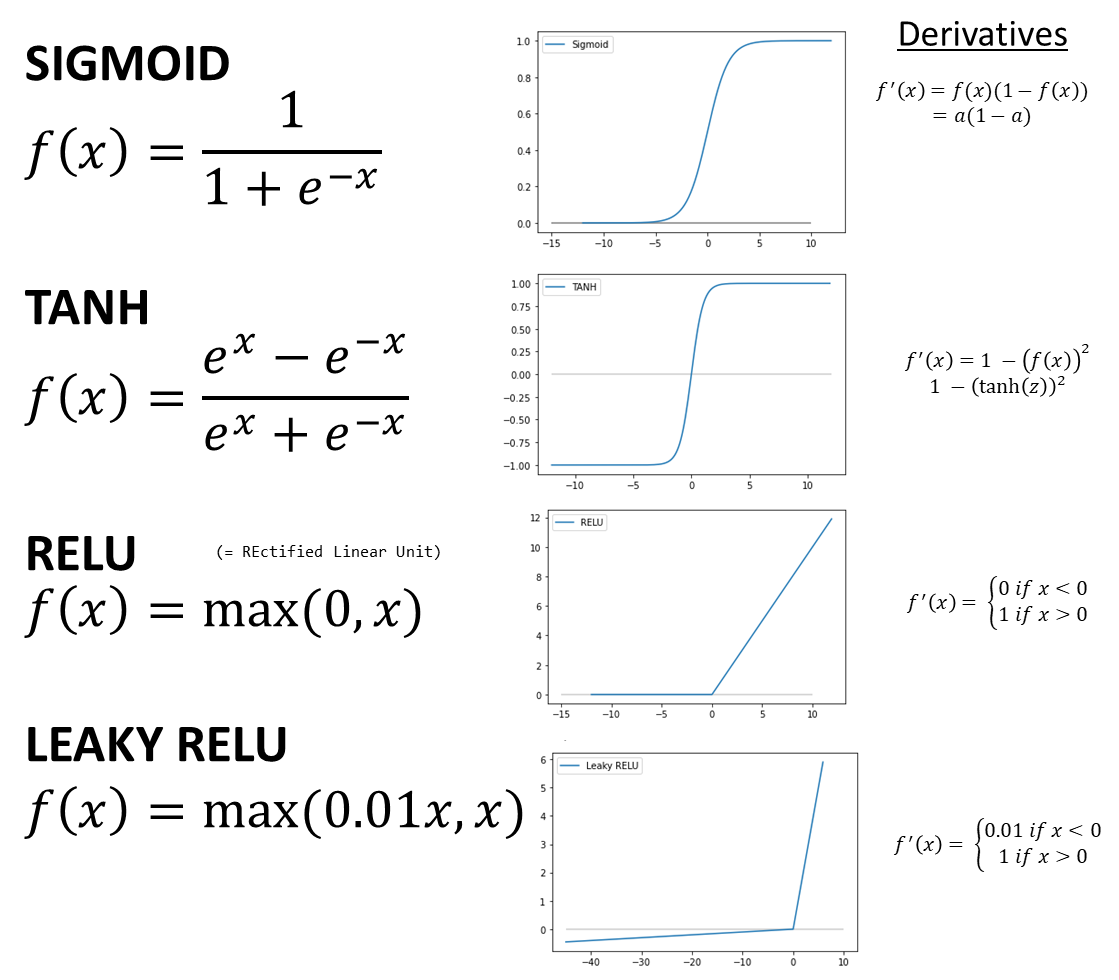

#### Softmax Activation

The softmax activation takes a vector and raises $e$ to the power of each of its elements.  This has the effect of making everything a positive number.

If we want probabilities, then we can divide each of the elements by the sum of the elements, ie by dividing the softmax by $(e^1 + e^{-1} + e^0 + e^3)$.

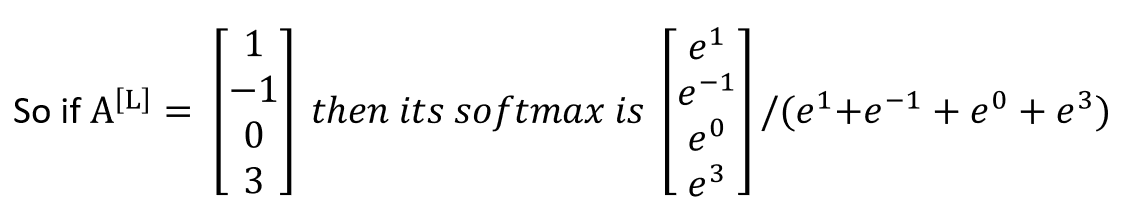


A vector obtained from a softmax operations will have probabilities that add to 1.  

A HARDMAX will be identical to a softmax except that all entries will be zero except one which will be equal to 1.

**Loss Calculation for Softmax**  

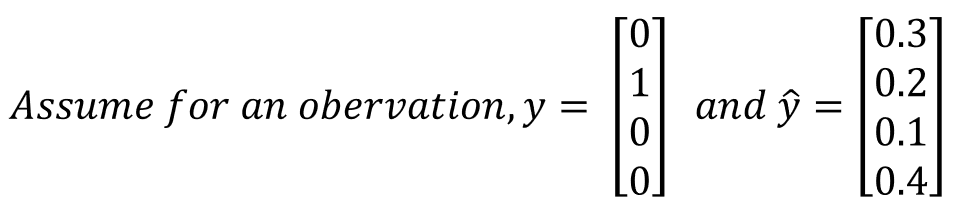

In this case, the loss for the above will be calculated as:  


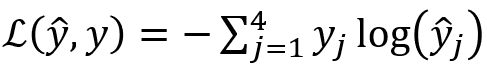


Here you have only the second category, ie $y_2=1$, the rest are zero.  

So effectively the loss reduces to $-log(0.2)$.  



### Which Activation Function to Use?

Mostly always RELU for hidden layers.  

The last layer’s activation function must match your use case, and give you an answer in the shape you desire your output.  So SIGMOID would not be a useful activation function for a regression problem (eg, home prices).  

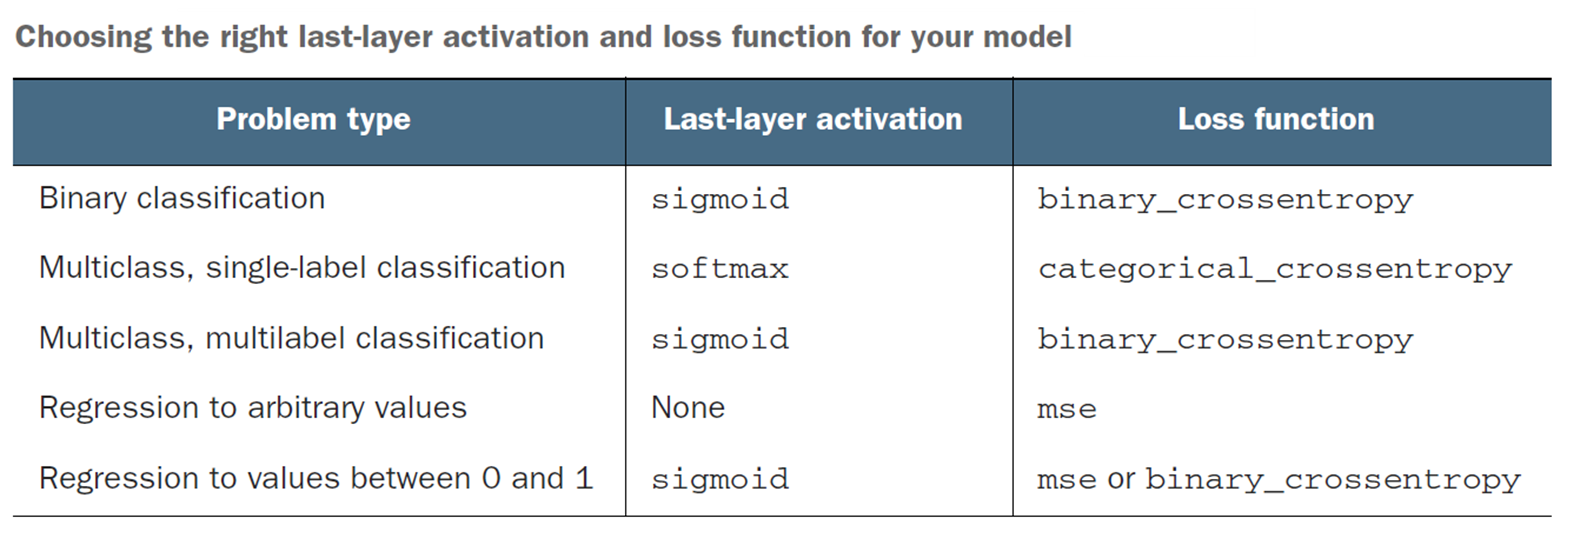

Source: Deep Learning with Python, François Chollet, Manning Publications



### Compiling a Model
Compiling a model means configures it for training.  As part of compiling the model, you specify the loss function, the metrics and the optimizer to use.  These are provided as three parameters:
 - Optimizer: Use rmsprop, and leave the default learning rate.  (You can also try adam if rmsprop errors out.)
 - Loss: Generally mse for regression problems, and binary_crossentropy/ categorical_crossentropy for binary and multiclass classification problems respectively.  
   - Categorical Cross Entropy loss is given by  
   
   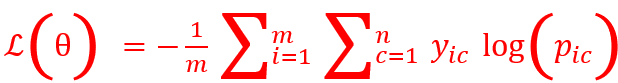  
   where i=1 to m are m observations, c= 1 to n are n classes, and $p_{ic}$ is the predicted probability.

   
   - If you have only two classes, ie binary classification, you get the loss   
   
   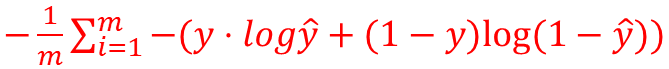
  
 - Metrics: This can be accuracy for classification, and MAE or MSE for regression problems.

The difference between Metrics and Loss is that metrics are for humans to interpret, and need to be intuitive.  Loss functions may use similar measures that are mathematically elegant, eg differentiable, continuous etc.  Often they can be the same (eg MSE), but sometimes they can be different (eg, cross entropy for classification, but accuracy for humans).


### Backpropagation  

**How do we get w and b?**  
So far, we have understood how a neural net is constructed, but how do we get the values of weights and biases so that the final layer gives us our desired output?  

At this point, calculus comes to our rescue.  

If y is our label/target, we want y-hat to be the same as (or as close as possible) to y.  

The loss function that we seek to minimize is a function of $L(\hat{y},y)$, where $\hat{y} $ is our prediction of $y$, and $y$ is the true value/label.  Know that $\hat{y} $ is also known as $a$, using the convention for nodes.



**The Setup for Understanding Backprop**  

Let us consider a simple example of binary classification, with two features x_1 and x_2 in our feature vector X.  There are two weights, w_1 and w_2, and a bias term b.  Our output is a.
In other words:

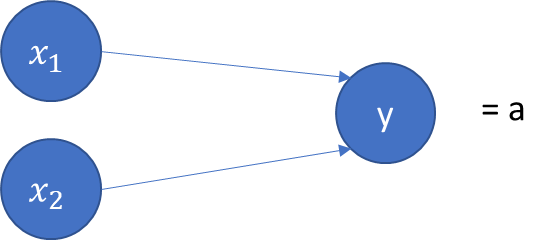


Our goal is to calculate a, or  

$\hat{y}=a=\sigma(z)$, where  $z=w_1 x_1+w_2 x_2+b$  

We use the sigmoid function as our activation function, and use the log-loss as our Loss function to optimize.  

  - Activation Function: $\sigma(z)=1/(1+e^{−z} )$ .  (Remember, $z=w_1 x_1+w_2 x_2+b$)  

  - Loss Function: $L(\hat{y},y)= −(y\cdotlog\hat{y}+(1−y)log(1−\hat{y})$)  


We need to minimize the loss function. We can minimize a function by calculating its derivative (and setting it equal to zero, etc)  

Our loss function is a function of $w_1,w_2$  and $b$. (Look again at the equations on the prior slide to confirm.)  

If we can calculate the partial derivatives $\delta  L/\delta  w_1$,$\delta L/\delta w_2$ and $\delta L/\delta b$ (or the Jacobian vector of partial derivatives), we can get to the minimum for our Loss function.  

For the loss function for our example, the derivative of the log-loss function is $f'(x) = f(x)(1-f(x)) = a(1-a)$ (stated without proof, but can be easily derived using the chain rule).  

That is an elegant derivative, easily computed.  Since backpropagation uses the chain rule for derivatives, which ends up pulling in the activation function into the mix together with the loss function, it is important that activation functions be differentiable.


**How it works**  
1. We start with random values for $w_1$,$w_2$ and $b$.  
2. We figure out the formulas for  $\delta L/\delta w_1$,$\delta L/\delta w_2$ and $\delta L/\delta b$.  
3. For each observation in our training set, we calculate the value of the derivative for each $x_1$,$x_2$ etc.  
4. We average the derivatives for the observations to get the derivative for our entire training population.  
5. We use this average derivative value to get the next better value of $w_1$,$w_2$ and $b$.  
   - $w_1  :=w_1−\alpha  \delta L/(\delta w_1 )$  
   - $w_2  :=w_2−\alpha  \delta L/(\delta w_2 )$  
   - $b :=b−\alpha  \delta L/\delta b$  
6. Where $\alpha $ is the learning rate as we don’t want to go too fast and miss the minima.  
7. Once we have better values of $w_1$,$w_2$ and $b$, we repeat this again.  

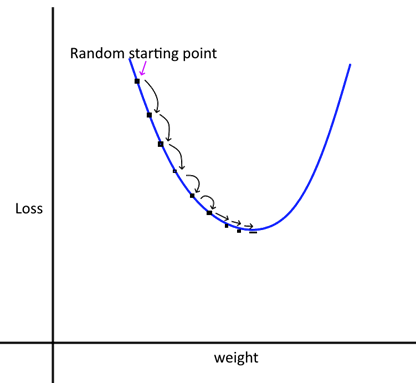


**Backpropagation**  

 1. Perform iterations – a full forward pass followed by a backward pass is a single iteration.  

 2. For every iteration, you can use all the observations, or only a sample to speed up learning.  The number of observations in an iteration is called batch size.  

 3. When all observations have completed an iteration, an epoch  is said to have been completed.  

That, in short, is how back-propagation works. Because it uses derivatives to arrive at the optimum value, it is also called gradient descent.  

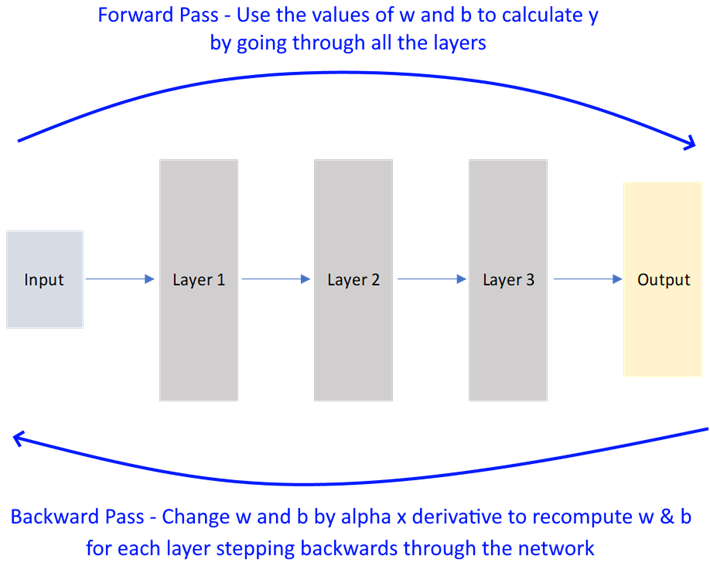  

We considered a very simple two variable case, but even with larger networks and thousands of variables, the concept is the same.  

### Batch Sizes & Epochs
**BATCH GRADIENT DESCENT**  
If you have m examples and pass all of them through the forward and backward pass simultaneously, it would be called BATCH GRADIENT DESCENT.  
If m is very large, say 5 million observations, then the gradient descent process can become very slow.  

**MINI-BATCH GRADIENT DESCENT**  
A better strategy may be to divide the m observations into mini-batches of 1000 each so that we can start getting the benefit from gradient descent quickly.
So we can divide m into ‘t’ mini-batches and loop through the t batches one by one, and keep improving network performance with each mini-batch.
Mini batch sizes are generally powers of 2, eg 64 (2^6), 128, 256, 512, 1024 etc.
So if m is 5 million, and mini-batch size is 1000, t will be from 1 to 5000.

**STOCHASTIC GRADIENT DESCENT**  
When mini-batch size is 1, it is called stochastic gradient descent, or SGD.

To sum up:  
 - When mini batch size = m, it is called BATCH GRADIENT DESCENT.  
 - When mini batch size = 1, it is called STOCHASTIC GRADIENT DESCENT.  
 - When mini batch size is between 1 and m, it is called MINI-BATCH GRADIENT DESCENT.  

**What is an EPOCH**  
An epoch is when the entire training dataset has been worked through the backpropagation algorithm.  That is when a complete pass of the data has been completed through the backpropagation algorithm.  


### Learning Rate

We take small steps from our random starting point to the optimum value of the weights and biases.
The step size is controlled by the learning rate (alpha).
If the learning rate is too small, it will take very long for the training to complete.
If the rate is large, we may miss the minima as we may step over it.

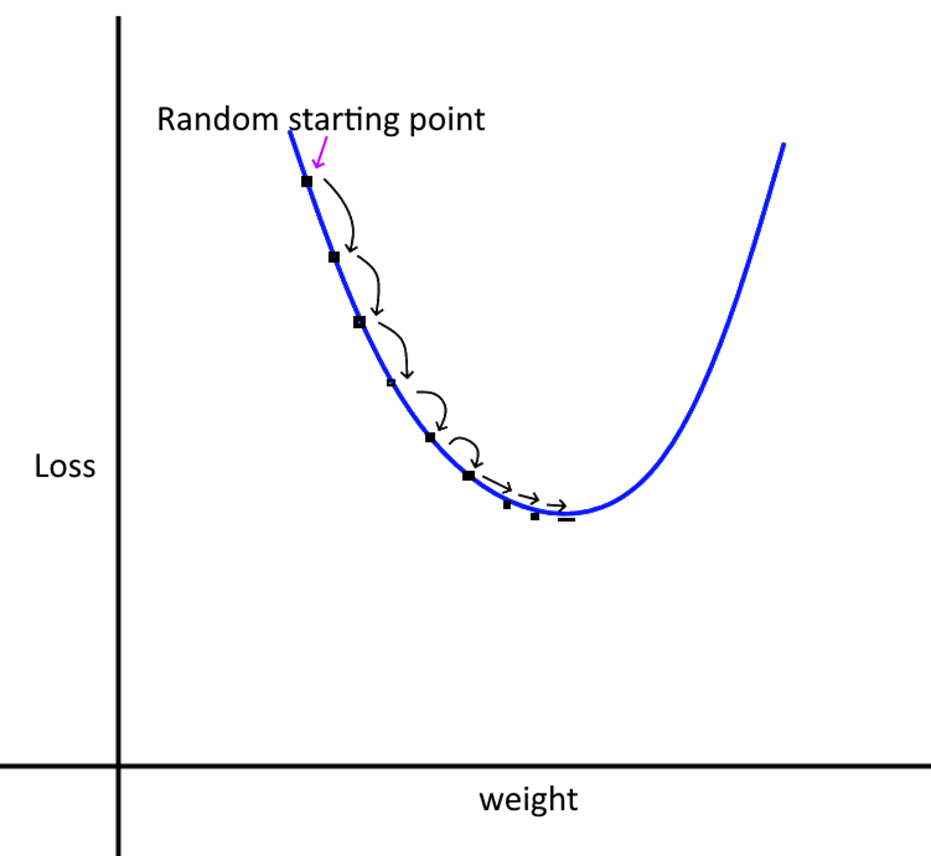

  - Intuitively, what we want is large steps in the beginning, and slower steps as we get closer to the optimal point.  
  - We can do this by using a momentum term, which can make the move towards the op+timum faster.  
  - The momentum term is called $\beta$  beta, and it is in addition to the \alpha  term.  
  - There are several optimization algorithms to choose from (eg ADAM, RMS Prop), and each may have its own implementation of beta.  
  - We can also vary the learning rate by decaying it for each subsequent epoch, for example:  

$\alpha _1 = \frac{1}{1 + \mbox{decay rate \times epoch number}}$ $\cdot \alpha _0$

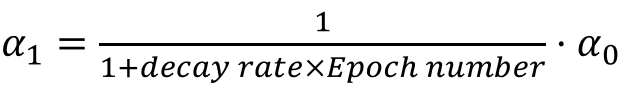  
etc


### Parameters and Hyperparameters

#### Parameters: weights and biases
Consider the network in the image. Each node’s output is $a^L$, and represents a 'feature' for consumption by the next layer.  
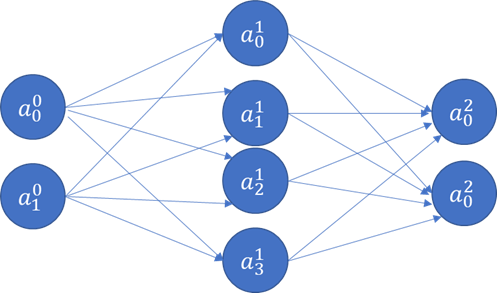

This feature is a new feature calculated as a synthetic combination of previous inputs using $\sigma(w^T x+b)$.  

Each layer will have a weights vector $w^L$, and a bias $b^L$.  

Let us pause a moment to think about how many weights and biases we need, and generally the ‘shape’ of our network.  

 - Layer 0 is the input layer.  It will have m observations and n features. 
 - In the example network below, there are 2 features in our input layer.  
 - The 2 features join with 4 nodes in Layer 1.  For each node in Layer 1, we need 2 weights and 1 bias term.  Since there are 4 nodes in Layer 2, we will need 8 weights and 4 biases.  
 - For the output layer, each of the 2 nodes will have 4 weights, and 1 bias term, making for 8 weights and 2 bias parameters.  
 - For the entire network, we need to optimize 16 weights and 6 bias parameters.  And this has to be done for every single observation in the training set for each epoch.  

#### Hyperparameters  
Hyperparameters for a network control several architectural aspects of a network.
The below are the key hyperparameters an analyst needs to think about:
  - Learning rate (alpha)  
  - Mini-batch size  
  - Beta (momentum term)  
  - Number of hidden neurons in each layer  
  - Number of layers  
There are other hyperparameters as well, and different hyperparameters for different network architectures.  

All hyperparameters can be specified as part of the deep learning network.  

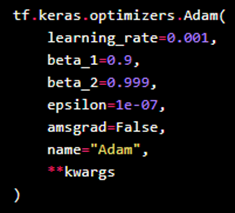

<font color='red'>
Applied deep learning is a very empirical process, ie, requires a lot of trial and error.
</font>

### Overfitting  
**The Problem of Overfitting**  

Optimization refers to the process of adjusting a model to get the best performance on training data.  

Generalization refers to how well the model performs on data it has not seen before.  

As part of optimization, the model will try to "memorize" the training data using the parameters it is allowed.  If there is not a lot of data to train on, optimization may happen quickly, as patterns would be learned.  

But such a model may have poor real world performance, while having exceptional training set performance.  This problem is called ‘overfitting’.  

**Fighting Overfitting**  
There are several ways of dealing with overfitting:  
 - Get more training data:  More training data means better generalization, and avoiding learning misleading patterns that only exist in the training data.  
 - Reduce the size of the network: By reducing layers and nodes in the network, we can reduce the ability of the network to overfit.  Surprisingly, smaller networks can have better results than larger ones!  
 - Regularization: Penalize large weights, biases and activations.  

**Regularization of Networks**  
#### L2 Regularization
 - In regularization, we add a term to our cost function as to create a penalty for large w vectors. This helps reduce variance (overfitting) by pushing w entries closer to zero.
 - But regularization can increase bias, but often a balance can be struck.
 - L2 regularization can cause ‘weight decay’, ie gradient descent shrinks the weights on each iteration.


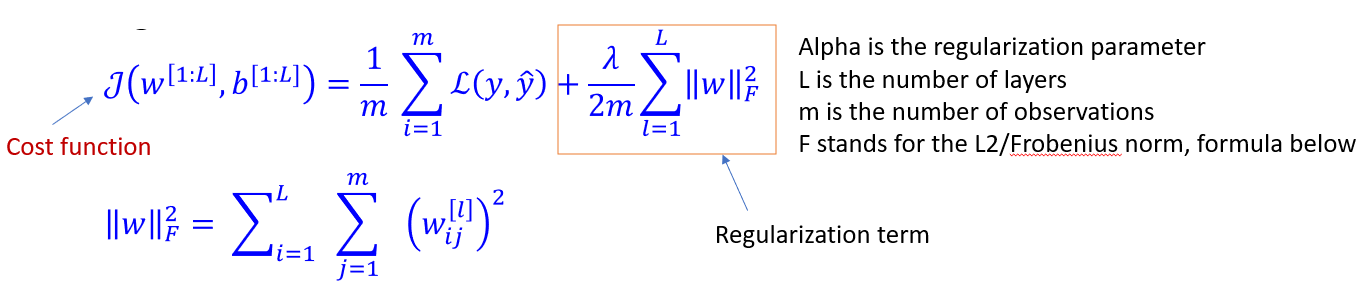  

In Keras, regularization can be specified as part of the layer parameters.  

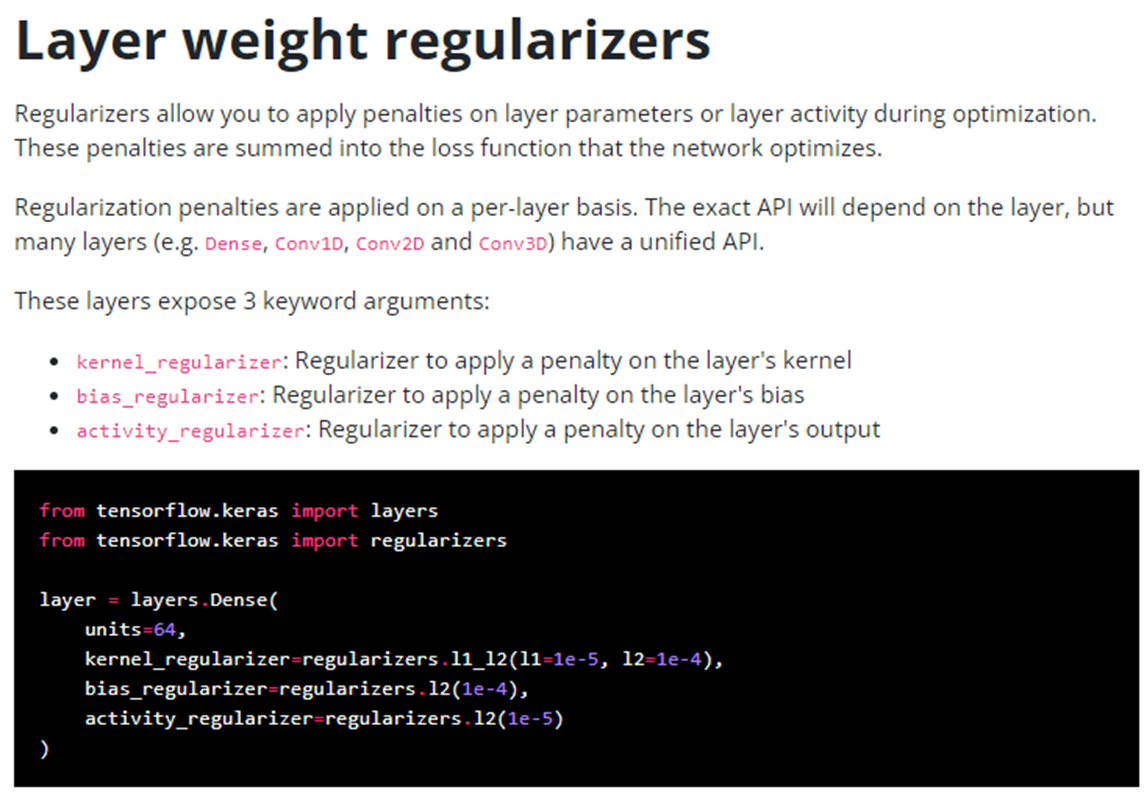  

Source: https://keras.io/api/layers/regularizers/

#### Drop-out Regularization

With drop-out regularization, we drop, which means completely zero out many of a network’s nodes by setting their output to zero.  We do this separately for each observation in the forward prop step.  Which means in the same pass, different nodes would be deleted for each training example.  This has the effect of reducing network size, hence reducing variance/overfitting.  

Setting a node’s output to zero means eliminating an input into the next layer.  Which means reducing features at random.  Since inputs disappear at random, the weight gets spread out instead of relying upon one feature.  

‘Keep-prob’ means how much of the network we keep.  So 80% keep-prob means we drop 20%.  You can have different keep-prob values for different layers.  

One disadvantage of drop-out regularization is that the cost function becomes ill defined.  And gradient descent does not work well.  

So you can still optimize without drop-outs, and once all hyper-parameters have been optimized, switch to a drop-out version with the hope that the same hyper-parameters are still the best.  

Drop-out regularization is implemented in Keras as a layer type.  


### Training, Validation and Test Sets

In deep learning, data is split into 3 sets: training, validation and test.  
 - Train on training data, and evaluate on validation data.  
 - When ready for the real world, test it a final time on the test set  

Why not just training and test sets?  This is because developing a model always involves tuning its hyperparameters.  This tuning happens on the validation set.   

Doing it repeatedly can lead to overfitting to the validation set, even though the model never directly sees it.  As you tweak the hyperparameters repeatedly, information leakage occurs where the algorithm starts to fit the model to do well on the validation set, with poor generalization.

**Approaches to Validation**  
Two primary approaches:  
 - Simple hold-out validation: Useful if you have lots of data  
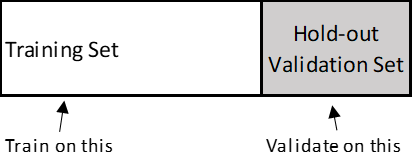  
 - K-fold Validation: (in the illustration below, k is 4) – if you have less data  

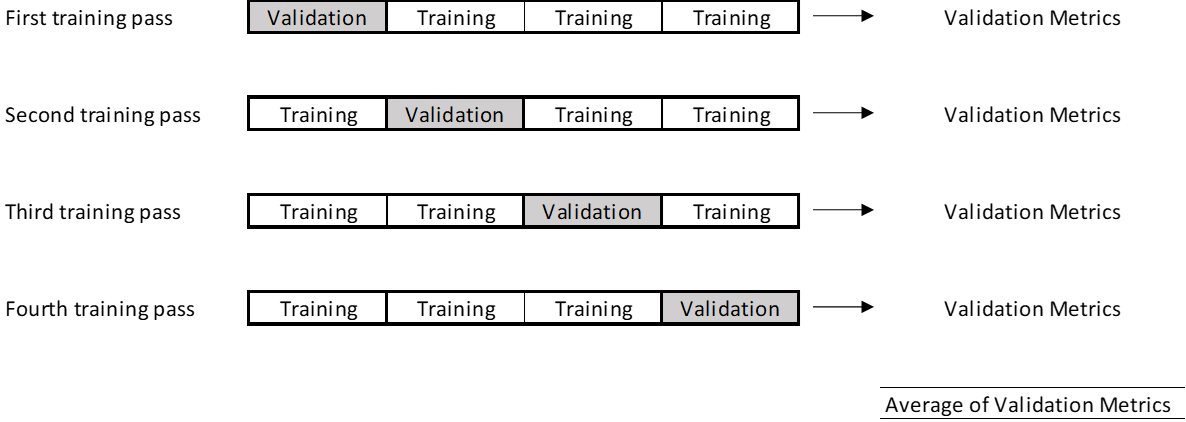  

### Data Pre-Processing for Neural Nets  
All data must be expressed as tensors (another name for arrays) of floating point data.  Not integers, not text.  Neural networks:
 - Do not like large numbers.  Ideally, your data should be in the 0-1 range.  
 - Do not like heterogenous data.  Data is heterogenous when one feature is in the range, say, 0-1, and another is in the range 0-100.  

The above upset gradient updates, and the network may not converge or give you good results.
Standard Scaling of the data can help avoid the above problems.  As a default option – always standard scale your data.  


## Examples
## California Housing - Deep Learning

Next, we try to predict home prices using the California Housing dataset

In [17]:
## California housing dataset. medv is the median value to predict
from sklearn import datasets

X = datasets.fetch_california_housing()['data']
y = datasets.fetch_california_housing()['target']
features = datasets.fetch_california_housing()['feature_names']
DESCR = datasets.fetch_california_housing()['DESCR']

cali_df = pd.DataFrame(X, columns = features)
cali_df.insert(0,'Value', y)
cali_df

,Value,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [18]:
cali_df.Value.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Value, dtype: float64

In [19]:
cali_df = cali_df.query("Value<5")

In [20]:
X = cali_df.iloc[:, 1:]
y = cali_df.iloc[:, :1]

In [21]:
X = pd.DataFrame(preproc.StandardScaler().fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [22]:
X

,0,1,2,3,4,5,6,7
0,2.959952,1.009853,0.707472,-0.161044,-0.978430,-0.050851,1.036333,-1.330014
1,2.944799,-0.589669,0.382175,-0.275899,0.838805,-0.092746,1.027030,-1.325029
2,2.280068,1.889591,1.276098,-0.051258,-0.826338,-0.027663,1.022379,-1.335000
3,1.252220,1.889591,0.198688,-0.052114,-0.772144,-0.051567,1.022379,-1.339986
4,0.108107,1.889591,0.401238,-0.034372,-0.766026,-0.086014,1.022379,-1.339986
...,...,...,...,...,...,...,...,...
19643,-1.347359,-0.269765,-0.137906,0.081199,-0.521280,-0.050377,1.780515,-0.761637
19644,-0.712873,-0.829598,0.328060,0.484752,-0.948710,0.002467,1.785166,-0.821466
19645,-1.258410,-0.909574,-0.068098,0.051913,-0.379677,-0.072463,1.757259,-0.826452
19646,-1.151951,-0.829598,-0.014039,0.166543,-0.612186,-0.091490,1.757259,-0.876310


In [23]:
model = keras.Sequential()
model.add(Input(shape=(X_train.shape[1],))) ## INPUT layer 0
model.add(Dense(100, activation = 'relu'))  ## Hidden layer 1
model.add(Dropout(0.2))                     ## Hidden layer 2
model.add(Dense(200, activation = 'relu'))  ## Hidden layer 3
model.add(Dense(1))                         ## OUTPUT layer


In [24]:
X_train.shape[1]

8

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               900       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 21301 (83.21 KB)
Trainable params: 21301 (83.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss= "mean_squared_error" , 
              optimizer="adam", 
              metrics=["mean_squared_error"])

In [27]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=4)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split = 0.1, callbacks=[callback])
print('Done')

Epoch 1/100
111/111 [==============================] - 1s 4ms/step - loss: 1.1333 - mean_squared_error: 1.1333 - val_loss: 0.4895 - val_mean_squared_error: 0.4895
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.4327 - mean_squared_error: 0.4327 - val_loss: 0.3858 - val_mean_squared_error: 0.3858
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3641 - mean_squared_error: 0.3641 - val_loss: 0.3701 - val_mean_squared_error: 0.3701
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3414 - mean_squared_error: 0.3414 - val_loss: 0.3155 - val_mean_squared_error: 0.3155
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.3288 - mean_squared_error: 0.3288 - val_loss: 0.3369 - val_mean_squared_error: 0.3369
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.3137 - mean_squared_error: 0.3137 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 7/100
111/111 [=

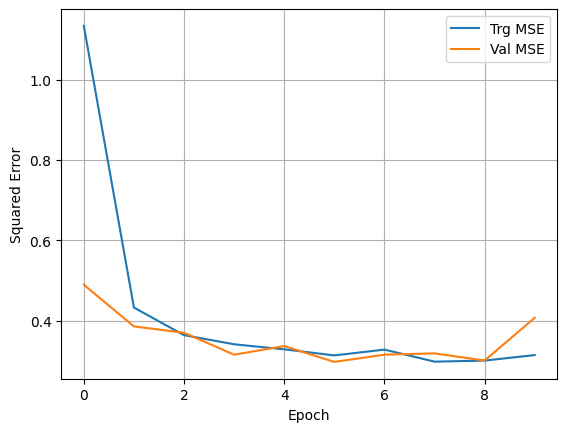

In [28]:
plt.plot(history.history['mean_squared_error'], label='Trg MSE')
plt.plot(history.history['val_mean_squared_error'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('Squared Error')
plt.legend()
plt.grid(True)

In [29]:
y_pred = model.predict(X_test)

123/123 [==============================] - 0s 955us/step


In [30]:
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  0.3026244068858136
RMSE =  0.5501130855431577
MAE =  0.38099100065650404


Text(0, 0.5, 'Predicted')

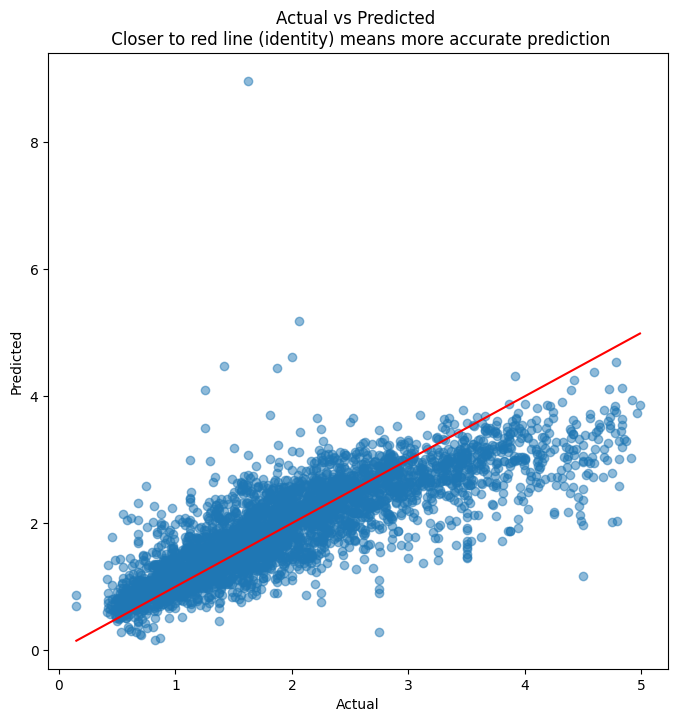

In [31]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted \n Closer to red line (identity) means more accurate prediction')
plt.plot( [y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [32]:
## R-squared calculation  

pd.DataFrame({'actual':y_test.iloc[:,0].values, 'predicted':y_pred.ravel()}).corr()**2

,actual,predicted
actual,1.000000,0.683438
predicted,0.683438,1.000000


### California Housing - XGBoost  

Just with a view to comparing the performance of our deep learning network above to XGBoost, we fit an XGBoost model.  


In [33]:
## Fit model
from xgboost import XGBRegressor

model_xgb_regr = XGBRegressor()
model_xgb_regr.fit(X_train, y_train)
model_xgb_regr.predict(X_test)

array([2.1309536 , 1.5673891 , 0.9350889 , ..., 0.93870777, 1.040574  ,
       1.6304413 ], dtype=float32)

In [34]:
## Evaluate model
y_pred  =  model_xgb_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  0.18330689553497856
RMSE =  0.4281435454785913
MAE =  0.28907724570828114


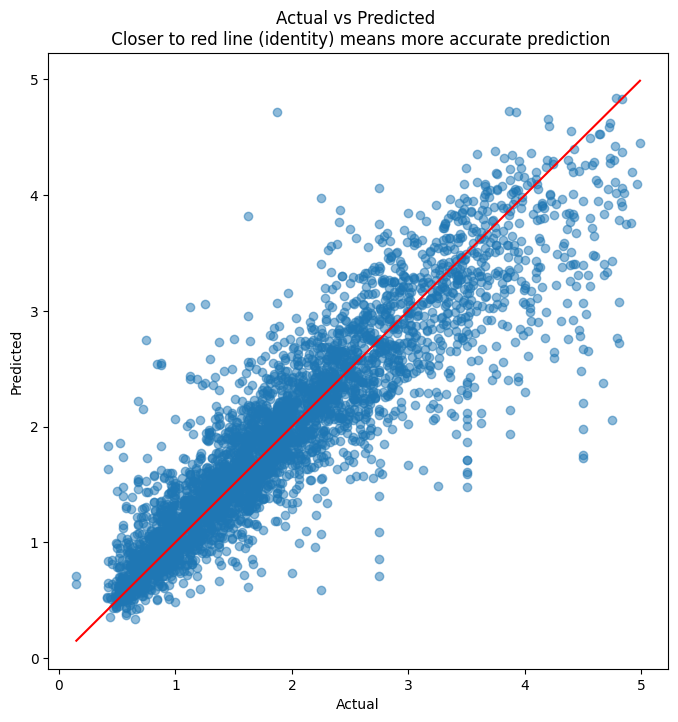

In [35]:
## Evaluate residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted \n Closer to red line (identity) means more accurate prediction')
plt.plot(  [y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [36]:
## R-squared calculation  

pd.DataFrame({'actual':y_test.iloc[:,0].values, 'predicted':y_pred.ravel()}).corr()**2

,actual,predicted
actual,1.000000,0.806895
predicted,0.806895,1.000000


## Classification Example

In [37]:


df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:8]
X = pd.DataFrame(preproc.StandardScaler().fit_transform(X))
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
X_train.shape[1]

8

In [40]:
model = keras.Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
## model.add(Dense(100, activation='relu'))
## model.add(Dense(200, activation='relu'))
## model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='relu'))
## model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss= "binary_crossentropy" , optimizer="adam", metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=[callback])
print('\nDone!!')

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 0.6950 - accuracy: 0.5152 - val_loss: 0.6862 - val_accuracy: 0.6207
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.7261 - val_loss: 0.6767 - val_accuracy: 0.6293
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.7630 - val_loss: 0.6697 - val_accuracy: 0.6466
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6035 - accuracy: 0.7913 - val_loss: 0.6579 - val_accuracy: 0.6897
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5777 - accuracy: 0.8043 - val_loss: 0.6361 - val_accuracy: 0.6638
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5507 - accuracy: 0.8000 - val_loss: 0.6252 - val_accuracy: 0.6638
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.8065 - val_loss: 0.6130 - val_accuracy: 0.6983
Epoch 8/100


In [41]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7552


[0.5169153809547424, 0.7552083134651184]

In [42]:
## evaluate the keras model
ss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy*100)

6/6 [==============================] - 0s 0s/step - loss: 0.5169 - accuracy: 0.7552
Accuracy: 75.52083134651184


In [43]:
## Training Accuracy
pred_prob = model.predict(X_train)
threshold = 0.50

## pred = list(map(round, pred_prob))
pred = (model.predict(X_train)>threshold) * 1
from sklearn.metrics import (confusion_matrix, accuracy_score)
 
## confusion matrix
cm = confusion_matrix(y_train, pred)
print ("Confusion Matrix : \n", cm)
 
## accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train, pred))

18/18 [==============================] - 0s 714us/step
Confusion Matrix : 
 [[333  40]
 [ 81 122]]
Train accuracy =  0.7899305555555556


In [44]:
## Testing Accuracy
pred_prob = model.predict(X_test)
threshold = 0.50


## pred = list(map(round, pred_prob))
pred = (model.predict(X_test)>threshold) * 1
from sklearn.metrics import (confusion_matrix, accuracy_score)
 
## confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
 
## accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))

6/6 [==============================] - 0s 1ms/step
Confusion Matrix : 
 [[108  19]
 [ 28  37]]
Test accuracy =  0.7552083333333334


In [45]:
# Look at the first 10 probability scores
pred_prob[:10]

array([[0.9567451 ],
       [0.3258782 ],
       [0.6599278 ],
       [0.2595277 ],
       [0.26577592],
       [0.19448401],
       [0.40406805],
       [0.2673347 ],
       [0.14933877],
       [0.16049503]], dtype=float32)

In [46]:
pred = (model.predict(X_test)>threshold) * 1

6/6 [==============================] - 0s 1ms/step


In [47]:
pred.shape

(192, 1)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       127
           1       0.66      0.57      0.61        65

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



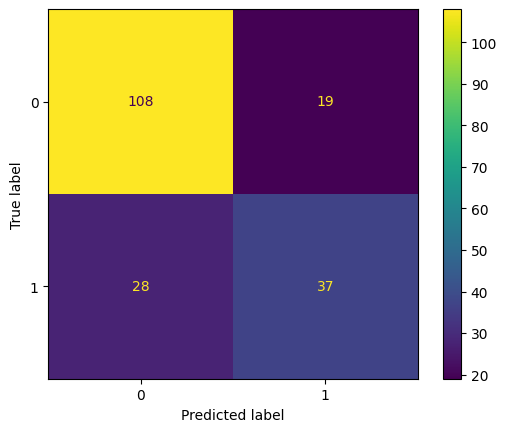

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
## ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = pred, cmap='Greys')

In [49]:
## AUC calculation
metrics.roc_auc_score(y_test, pred_prob)

0.8195033313143549

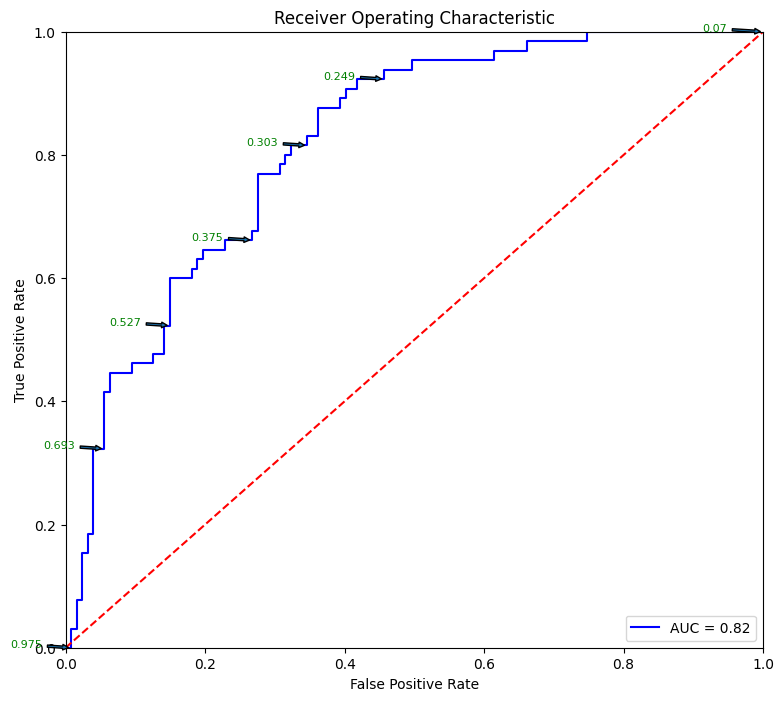

In [50]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
for i, txt in enumerate(thresholds):
    if i in np.arange(1, len(thresholds), 10): # print every 10th point to prevent overplotting:
        plt.annotate(text = round(txt,3), xy = (fpr[i], tpr[i]),  
                     xytext=(-44, 0), textcoords='offset points',
                     arrowprops={'arrowstyle':"simple"}, color='green',fontsize=8)
plt.show()

## Multi-class Classification Example

In [51]:
df=sns.load_dataset('iris')

In [52]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(df['species'].values.ravel()) ## This needs a 1D arrary

list(enumerate(le.classes_))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

In [54]:
from tensorflow.keras.utils import to_categorical
X = df.iloc[:,:4]
y = to_categorical(encoded_labels)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [56]:
model = keras.Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

## compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## fit the keras model on the dataset
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
model.fit(X_train, y_train, epochs=150, batch_size=10, callbacks = [callback])

print('\nDone')

Epoch 1/150
12/12 [==============================] - 1s 1ms/step - loss: 1.2377 - accuracy: 0.3214
Epoch 2/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0604 - accuracy: 0.3214
Epoch 3/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9751 - accuracy: 0.4018
Epoch 4/150
12/12 [==============================] - 0s 1ms/step - loss: 0.9184 - accuracy: 0.3750
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 0.8790 - accuracy: 0.6250
Epoch 6/150
12/12 [==============================] - 0s 3ms/step - loss: 0.8514 - accuracy: 0.6875
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.6875
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7870 - accuracy: 0.6875
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7565 - accuracy: 0.6875
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 0.7268 - accuracy: 0.6964
Epoch 11/

In [57]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5164 - accuracy: 0.8684


[0.5164453387260437, 0.8684210777282715]

In [58]:
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [59]:
pred = model.predict(X_test)
pred

2/2 [==============================] - 0s 2ms/step


array([[0.10434052, 0.4904323 , 0.4052272 ],
       [0.02435184, 0.3407135 , 0.63493466],
       [0.07040267, 0.46226057, 0.4673367 ],
       [0.11157056, 0.4931238 , 0.39530566],
       [0.01352766, 0.35704842, 0.6294239 ],
       [0.11930868, 0.47971955, 0.40097177],
       [0.8687346 , 0.1099081 , 0.0213573 ],
       [0.11923274, 0.47977632, 0.40099093],
       [0.01045814, 0.36289576, 0.6266461 ],
       [0.07020256, 0.44560656, 0.48419088],
       [0.14212564, 0.4767246 , 0.38114974],
       [0.07484493, 0.47705466, 0.4481004 ],
       [0.03225027, 0.3996072 , 0.5681425 ],
       [0.03141166, 0.4056031 , 0.5629852 ],
       [0.0391319 , 0.39420456, 0.5666635 ],
       [0.9157718 , 0.07237544, 0.01185276],
       [0.8965679 , 0.08632032, 0.01711177],
       [0.8743144 , 0.10434621, 0.02133935],
       [0.04477472, 0.44036406, 0.51486117],
       [0.00388781, 0.2708646 , 0.72524756],
       [0.02991862, 0.41405183, 0.5560295 ],
       [0.00617027, 0.3224875 , 0.6713422 ],
       [0.

In [60]:
pred.shape

(38, 3)

In [61]:
np.array(le.classes_)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [62]:
print(classification_report(y_true = [le.classes_[np.argmax(x)] for x in y_test], y_pred = [le.classes_[np.argmax(x)] for x in pred]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.67      0.80        15
   virginica       0.74      1.00      0.85        14

    accuracy                           0.87        38
   macro avg       0.91      0.89      0.88        38
weighted avg       0.90      0.87      0.87        38



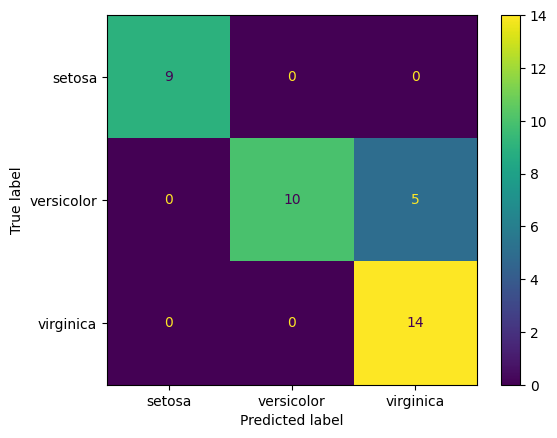

In [63]:
ConfusionMatrixDisplay.from_predictions([np.argmax(x) for x in y_test], [np.argmax(x) for x in pred], display_labels=le.classes_)

## Image Recognition with CNNs 
CNNs are used for image related predictions and analytics.  Uses include image classification, image detection (identify multiple objects in an image), classification with localization (draw a bounding box around an object of interest).  

CNNs also use weights and biases, but the approach and calculations are different from those done in a dense layer.  A convolutional layer applies to images, which are 3-dimensional arrays – height, width and channel.  Color images have 3 channels (one for each color RGB), while greyscale images have only 1 channel.  

Consider a 3 x 3 filter applied to a 3-channel 8 x 8 image:  

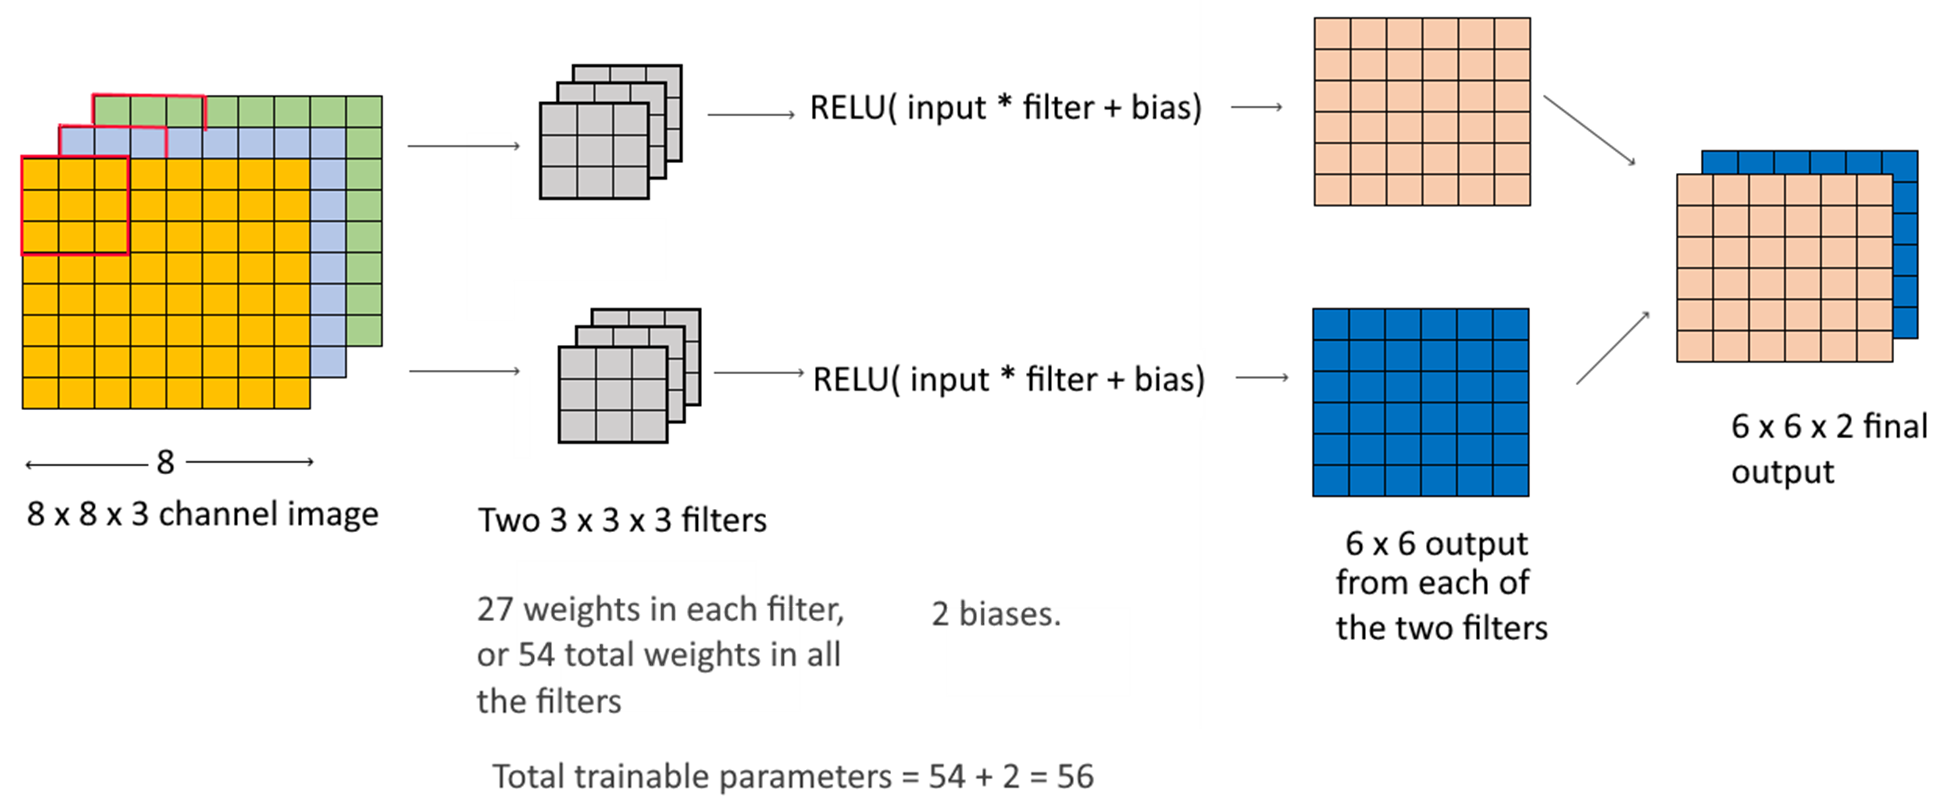 

We classify the MNIST dataset, which is built-in into keras. This is a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.   

Modeling the MNIST image dataset is akin to the ‘Hello World’ of image based deep learning.
Every image is a 28 x 28 array, with numbers between 1 and 255 ($2^8$)  

Example images:

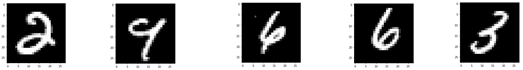  

**Next, we will try to build a network to identify the digits in the MNIST dataset**  

In [64]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [65]:
train_images.shape


(60000, 28, 28)

Labeled as: 3


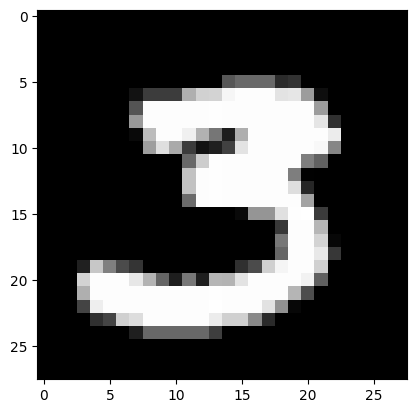

In [66]:
image_number = 1847 -4
plt.imshow(train_images[image_number], cmap='gray')
print('Labeled as:', train_labels[image_number])

In [67]:
train_labels[image_number]

3

In [68]:
## We reshape the image arrays in  a form that can be fed to the CNN
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [69]:
from tensorflow import keras
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D, Input
model = keras.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)             

In [71]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.1570 - accuracy: 0.9510
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0437 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0304 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0179 - accuracy: 0.9945


In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0233 - accuracy: 0.9926
Test accuracy: 0.9926000237464905


In [73]:
pred = model.predict(test_images)
pred

313/313 [==============================] - 2s 7ms/step


array([[1.94953900e-10, 2.56398125e-09, 4.69968668e-08, ...,
        9.99999285e-01, 1.10298182e-09, 1.21511938e-08],
       [3.09247072e-09, 2.66977551e-08, 1.00000000e+00, ...,
        6.69232844e-13, 9.19010874e-12, 7.08692403e-16],
       [2.02363211e-07, 9.99989152e-01, 1.45630111e-06, ...,
        2.91970650e-06, 1.25474457e-06, 1.14505546e-07],
       ...,
       [3.61875277e-14, 7.34440619e-10, 1.32110262e-12, ...,
        3.59249097e-09, 5.93236962e-08, 3.77870180e-10],
       [1.15246884e-07, 1.24072861e-11, 1.75145731e-11, ...,
        2.39164921e-11, 5.74675680e-04, 2.04602252e-10],
       [4.07735463e-08, 4.53869886e-10, 1.74073341e-06, ...,
        5.52450948e-14, 1.61409616e-07, 9.06823835e-12]], dtype=float32)

In [74]:
pred.shape

(10000, 10)

In [75]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [76]:
print(classification_report(y_true = [np.argmax(x) for x in pred], y_pred = test_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       984
           1       1.00      0.99      1.00      1141
           2       0.99      0.99      0.99      1030
           3       1.00      0.99      1.00      1016
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       888
           6       0.99      1.00      0.99       954
           7       0.99      0.99      0.99      1027
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1004

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



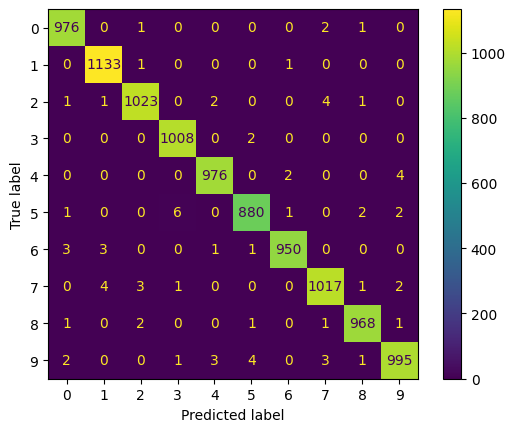

In [77]:
ConfusionMatrixDisplay.from_predictions(test_labels, [np.argmax(x) for x in pred])

## Recurrent Neural Networks  
One issue with Dense layers is they have no ‘memory’.  Every input is different, and processed separately, with no knowledge of what was processed before.  

In such networks, sequenced data is generally arranged back-to-back as a single vector, and fed into the network.  Such networks are called feedforward networks.  

While this works for structured/tabular data, it does not work too well for sequenced, or temporal data (eg, a time series, or a sentence, where words follow each other in a sequence).  

Recurrent Neural Networks try to solve for this problem by maintaining a memory, or state, of what it has seen so far.  The memory carries from cell to cell, gradually diminishing over time.  

A SimpleRNN cell processes batches of sequences.  It takes an input of shape `(batch_size, timesteps, input_features)`.  


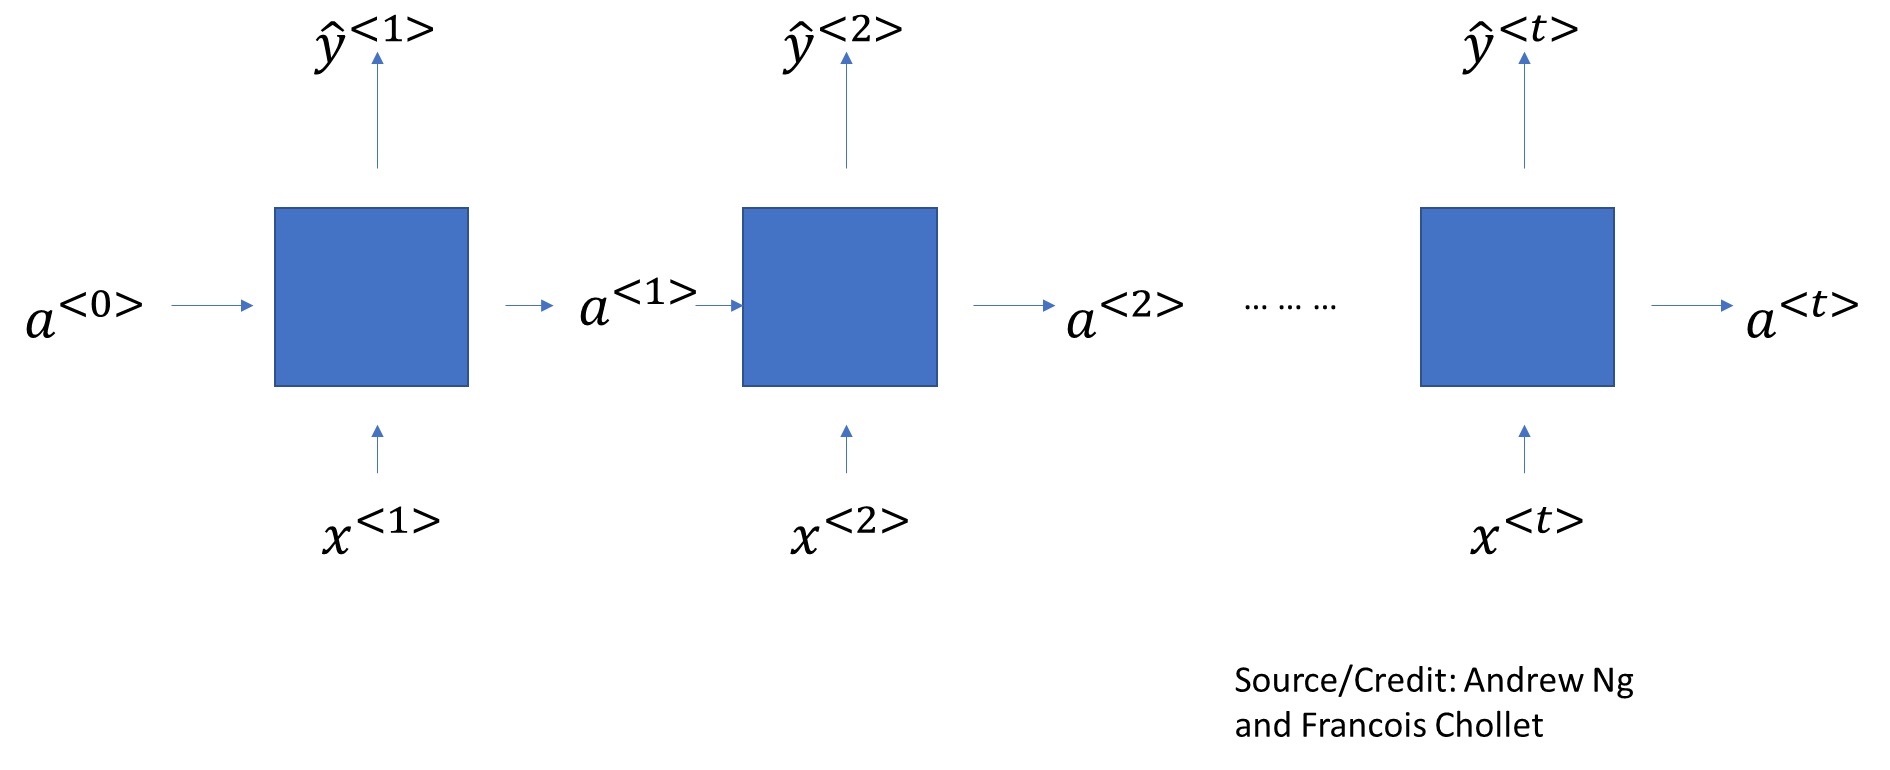

  

How the network calculates is:  

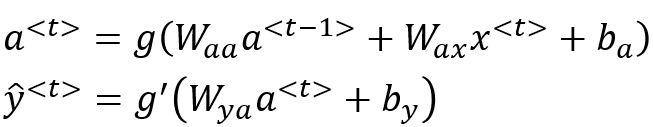

So for each element of the sequence, it calculates an $a$, and then it also calculates the output $\hat{y} $ as a function of both $a$ and $x$.  State information from previous steps is carried forward in the form of a.  

However SimpleRNNs suffer from the problem of exploding or vanishing gradients, and they don’t carry forward information into subsequent cells as well as they should.  

In practice, we use LSTM and GRU layers, which are also recurrent layers.

**The GRU Layer**  
GRU = Gated Recurrent Unit
The purpose of GRU is to retain memory of older layers, and persist old data in subsequent layers.  In GRU, an additional ‘memory cell’ $c^{<t>}$ is also output that is carried forward.  

The way it works is: find a ‘candidate value’ for $c^{<t>}$ called $\hat{c}^{<t>}$. Then find a ‘gate’, which is a 0 or 1 value, to decide whether to carry forward the $c^{<t>}$ value from the prior layer, or update it.

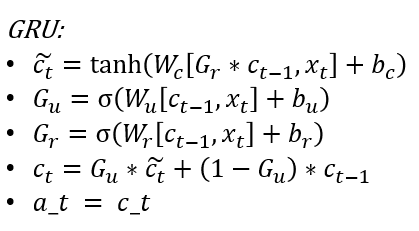

where 
 - $G_u$ is the UPDATE GATE,  
 - $G_f$ is the RESET GATE,  
 - $W$ are the various weight vectors, $b$ are the biases  
 - $x$ are the inputs, $a$ are the activations  
 - $tanh$ is the activation function  

Source/Credit: Andrew Ng


**The LSTM Layer**  
LSTM = Long Short Term Memory  
LSTM is a generalization of GRU.  The way it differs from a GRU is that in GRUs, $c ^ {<t>}$ and $a^{<t>}$ are the same, but in an LSTM they are different.  

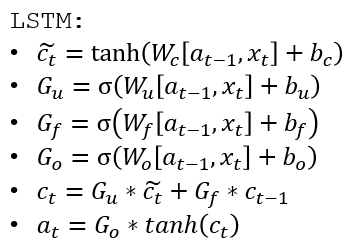 

where  
  - $G_u$ is the UPDATE GATE,  
  - $G_f$ is the FORGET GATE,  
  - $G_o$ is the OUTPUT GATE  
  - $W$ are the various weight vectors, $b$ are the biases  
  - $x$ are the inputs, $a$ are the activations  
  - $tanh$ is the activation function  
 
 

**Finally...**  
Deep Learning is a rapidly evolving field, and most state-of-the-art modeling tends to be fairly complex than the simple models explained in this brief class.  

Network architectures are difficult to optimize, there is no easy answer to the question of the number and types of layers, their size and order in which they are arranged.  

Data scientists spend a lot of time optimizing architecture and hyperparameters.  

Network architectures can be made arbitrarily complex.  While we only looked at ‘sequential’ models, models that accept multiple inputs, split processing in the network, and produce multiple outcomes are common.


***
## END
**STOP HERE**
***

## Example of the same model built using the Keras Functional API  
```Python  
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
```